## Examples of using the Mondrian forest and tree classifiers.

In [1]:
include("Mondrian_Forest_Classifier.jl")

show_mondrian_split_2d

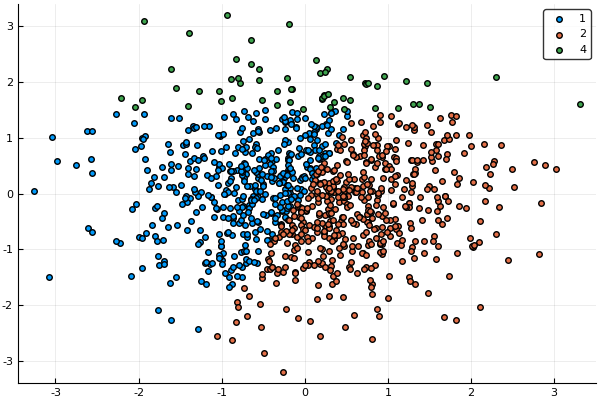

In [20]:
using MLBase
using Plots

function Fakedata3Classif(N,d,N_test=0)
    X = randn((N,d))
    param1 = randn(d)
    param2 = randn(d)
    Y = ( sum(X*param1,2) .> mean(sum(X*param2,2)) )
    Y=convert(Array{Int},Y)
    for i in 1:size(X,1)
        if X[i,2] > 1.5
            Y[i] = 3
        end
    end
    if (N_test > 0)
        x = randn((N_test,d))
        y = ( sum(x*param1,2) .> mean(sum(x*param2,2)) )
        y=convert(Array{Int},y)
        for i in 1:size(x,1)
            if x[i,2] > 1.5
                y[i] = 3
            end
        end
        return X,Y,x,y
    end
    return X,Y
end

X, Y, x, y = Fakedata3Classif(1000,2,1000);
Y = Y.+1;
y = y.+1;

if size(X,2)==2
    plot()
    for class in unique(Y)
        scatter!(X[Y.==class,1],X[Y.==class,2],label="$class")
    end
    plot!()
end

## Mondrian tree classifier

In [35]:
# initialise a mondreian tree classifier object with an empty tree
# and empty data. NB the underlying mondrian tree can be accessed by MT.Tree (see visualisation)
MT = Mondrian_Tree_Classifier()
# trains the tree and sets MT.X and MT.Y to the given training data
train!(MT,X,Y,1e9)

# predict on training and testing
pred=predict!(MT, X)
println("Train Accuracy")
println(correctrate(Y,convert(Array{Int,1},pred)))
pred=predict!(MT, x)
println("Accuracy") 
println(correctrate(y,convert(Array{Int,1},pred)))

# give the raw probs
predict_proba!(MT,x[1:10,:])

Train Accuracy
0.825
Accuracy
0.814


10-element Array{Any,1}:
 [0.433333, 0.566667, 0.0]
 [0.433333, 0.566667, 0.0]
 [0.433333, 0.566667, 0.0]
 [1.0, 0.0, 0.0]          
 [1.0, 0.0, 0.0]          
 [0.433333, 0.566667, 0.0]
 [0.433333, 0.566667, 0.0]
 [1.0, 0.0, 0.0]          
 [0.433333, 0.566667, 0.0]
 [0.433333, 0.566667, 0.0]

In [24]:
# repl output
MT

Mondrian Tree Classifier:
    Mondrian Tree with 42 leaves

In [25]:
# the data has been added
println(MT.X[1:10,:])
println(MT.Y[1:10])

[-0.746385 0.935147; -0.673192 -0.19854; 0.320562 -1.29961; -1.93724 3.08653; 0.916827 0.0404474; -0.776104 1.10943; 0.083544 0.268964; 1.57925 0.775973; -0.0208653 -1.3384; 1.34815 0.569979]
[1, 1, 2, 4, 2, 1, 1, 2, 2, 2]


## Extension (On-line Mondrain Tree Classifier)

In [36]:
println(size(MT.X))
# train on new data in on-line fashion
expand!(MT,x,y,1e9)
println(size(MT.X))

# now predicting with all data so should be similar
# accuracies
pred=predict!(MT, X)
println("Train Accuracy")
println(correctrate(Y,convert(Array{Int,1},pred)))
pred=predict!(MT, x)
println("Accuracy") 
println(correctrate(y,convert(Array{Int,1},pred)))

(1000, 2)
(2000, 2)
Train Accuracy
0.796
Accuracy
0.805


## Visualisation

Based on DecisionTree.jl print_tree function. TODO draw with Graphs.jl

In [7]:
MT = Mondrian_Tree_Classifier()
# low λ value to show the plotting
train!(MT,X,Y,0.2)
pred=predict!(MT, X)
println("Train Accuracy")
println(correctrate(Y,convert(Array{Int,1},pred)))

# print the text based vis
print_mondrian_tree(get(MT.Tree.root))

Train Accuracy
0.649
τ: 0.102
L-> τ: 0.104
    L-> τ: 0.106
        L-> Prediction: [0.943, 0.057, 0.0]
        R-> Prediction: [0.623, 0.377, 0.0]
    R-> Prediction: [0.546, 0.454, 0.0]
R-> τ: 0.139
    L-> Prediction: [0.999, 0.001, 0.0]
    R-> τ: 0.151
        L-> τ: 0.167
            L-> τ: 0.175
                L-> Prediction: [0.459, 0.541, 0.0]
                R-> Prediction: [0.009, 0.991, 0.0]
            R-> Prediction: [0.011, 0.989, 0.0]
        R-> Prediction: [0.001, 0.999, 0.0]


### The splits can be visualised for an individual Mondrian_Tree_Classifier

Here a plot and animation are returned, plot is the final still. If animation=false
then a one frame animation and plot are returned (both the final plot).

In [8]:
X, Y, x, y = FakedataClassif(100,2,25);
Y = Y.+1;
y = y.+1;

MT = Mondrian_Tree_Classifier()
train!(MT,X,Y,1e6)
pred=predict!(MT, X)
println("Train Accuracy")
println(correctrate(Y,convert(Array{Int,1},pred)))

# plots the splits for a Mondrian_Tree_Classifier in 2_d could do
# higher d but would only plot dimension 1,2
f,a = show_mondrian_split_2d(MT,Data=true,animation=true);
gif(a,"resources/MT.gif",fps=1)

Train Accuracy
0.88


INFO: Saved animation to /home/harvey/Group Project/warwick-rsg/MondrianForest/resources/MT.gif


Plots.AnimatedGif("/home/harvey/Group Project/warwick-rsg/MondrianForest/resources/MT.gif")

# Mondrian Forest classifier

Python has $\sim 27 - 33$ seconds runtime, $\sim 276-619$ MiB of memory allocations, and about $0.8-0.92$ accuracy on an
equivalent problem

See [python comparison](comparisons/python_comp.ipynb) and the plots below. S


![alt text](comparisons/n_tree_scale.png)

Yet to update data scale with paused mondrians and parallel training

![alt text](comparisons/n_data_scale.png)

In [37]:
X, Y, x, y = FakedataClassif(1000,5,100);
Y = Y.+1;
y = y.+1;

# creates a mondrian forest classifier with 100 mondrian tree classifiers
MF = Mondrian_Forest_Classifier(100)
# time and memory separately
tic()
train!(MF, X, Y, 1e9)
toc()
# prediction is greatest time hog
tic()
pred=predict!(MF, X);
toc()
println("Train Accuracy")
println(correctrate(Y,convert(Array{Int,1},pred)))
pred=predict!(MF, x)
println("Accuracy") 
println(correctrate(y,convert(Array{Int,1},pred)))

MF = Mondrian_Forest_Classifier(100)
println("Allocations: ", @allocated(train!(MF,X,Y,1e9))/1e6, " Mb")

elapsed time: 0.32706532 seconds
elapsed time: 0.63403339 seconds
Train Accuracy
0.972
Accuracy
0.84
Allocations: 0.003408 Mb


In [38]:
predict_proba!(MF,x[1:10,:])

10-element Array{Array{Float64,1},1}:
 [0.479168, 0.520832]
 [0.487937, 0.512063]
 [0.579359, 0.420641]
 [0.330398, 0.669602]
 [0.768802, 0.231198]
 [0.37332, 0.62668]  
 [0.514078, 0.485922]
 [0.418058, 0.581942]
 [0.678169, 0.321831]
 [0.49062, 0.50938]  

## Extension (On-line Mondrian Forest Classifer)

In [39]:
println(size(MF.X))
# train on new data in on-line fashion
expand!(MF,x,y,1e9)
println(size(MF.X))

# now predicting with all data so should be similar
# accuracies
pred=predict!(MF, X)
println("Train Accuracy")
println(correctrate(Y,convert(Array{Int,1},pred)))
pred=predict!(MF, x)
println("Accuracy") 
println(correctrate(y,convert(Array{Int,1},pred)))

(1000, 5)
(1100, 5)
Train Accuracy
0.958
Accuracy
0.85


In [40]:
# repl output
MF

Mondrian Forest Classifier with 100 Mondrian trees:
    Mondrian Tree with 95 leaves
    Mondrian Tree with 94 leaves
    Mondrian Tree with 15 leaves
    Mondrian Tree with 101 leaves
    Mondrian Tree with 79 leaves
    Mondrian Tree with 100 leaves
    Mondrian Tree with 36 leaves
    Mondrian Tree with 84 leaves
    Mondrian Tree with 70 leaves
    Mondrian Tree with 73 leaves
    Mondrian Tree with 62 leaves
    Mondrian Tree with 80 leaves
    Mondrian Tree with 51 leaves
    Mondrian Tree with 61 leaves
    Mondrian Tree with 49 leaves
    Mondrian Tree with 54 leaves
    Mondrian Tree with 70 leaves
    Mondrian Tree with 97 leaves
    Mondrian Tree with 45 leaves
    Mondrian Tree with 71 leaves
    Mondrian Tree with 84 leaves
    Mondrian Tree with 26 leaves
    Mondrian Tree with 96 leaves
    Mondrian Tree with 68 leaves
    Mondrian Tree with 57 leaves
    Mondrian Tree with 40 leaves
    Mondrian Tree with 74 leaves
    Mondrian Tree with 35 leaves
    Mondrian Tree with

# MLBase Gridtune

Something is wrong here

In [41]:
d=2
X, Y, x, y = FakedataClassif(1000,d,100);
Y = Y.+1;
y = y.+1;

# Currently adding @parallel to the for loop in train! causes
# train! within MLBase's gridtune to be unable to modify the
# Mondrian_Forest_Classfier Trees array....
function train_for_mlbase!(MF::Mondrian_Forest_Classifier,
                X::Array{Float64,2},
                Y::Array{Int64},
                λ::Float64=1e9)

    for i in 1:MF.n_trees
        MT = Mondrian_Tree_Classifier()
        train!(MT, X, Y, λ)
        push!(MF.Trees,MT)
    end
    MF.X = X
    MF.Y = Y
end

function estfun(n_trees,λ)
    MF = Mondrian_Forest_Classifier()
    train_for_mlbase!(MF,X,Y,λ)
    return MF
end

function evalfun(MF)
    return correctrate(y, predict!(MF,x))
end

@time best_model, best_config, best_score = gridtune(estfun, 
                                               evalfun, 
                                               ("n_trees",[10,100,250,500]),
                                               ("λ",[1e1,1e2,1e4,1e8,1e16]),
                                               verbose=true
)
println("\nBest Configuration: ", best_config)
println("\nBest score: ", best_score)

[n_trees=10, λ=10.0] => 0.98
[n_trees=100, λ=10.0] => 0.97
[n_trees=250, λ=10.0] => 0.96
[n_trees=500, λ=10.0] => 0.97
[n_trees=10, λ=100.0] => 0.97
[n_trees=100, λ=100.0] => 0.98
[n_trees=250, λ=100.0] => 0.97
[n_trees=500, λ=100.0] => 0.97
[n_trees=10, λ=10000.0] => 0.95
[n_trees=100, λ=10000.0] => 0.98
[n_trees=250, λ=10000.0] => 0.96
[n_trees=500, λ=10000.0] => 0.98
[n_trees=10, λ=1.0e8] => 0.97
[n_trees=100, λ=1.0e8] => 0.99
[n_trees=250, λ=1.0e8] => 0.97
[n_trees=500, λ=1.0e8] => 0.99
[n_trees=10, λ=1.0e16] => 0.97
[n_trees=100, λ=1.0e16] => 0.97
[n_trees=250, λ=1.0e16] => 0.98
[n_trees=500, λ=1.0e16] => 0.97
  2.633941 seconds (26.80 M allocations: 826.537 MiB, 10.10% gc time)

Best Configuration: (100, 1.0e8)

Best score: 0.99


This benchmark is a little unbelievable... but the accuracy is still good, perhaps it is the
paused mondrians (the python does use these though) or Julia's time function is not working 

4.6694e-5
  0.001055 seconds (39.86 k allocations: 737.578 KiB)
2
5.3103e-5
  0.002329 seconds (64.89 k allocations: 1.155 MiB)
4
3.7389e-5
  0.004545 seconds (138.27 k allocations: 2.381 MiB)
8
2.9516e-5
  0.008185 seconds (275.38 k allocations: 4.685 MiB)
16
5.3125e-5
  0.023833 seconds (593.13 k allocations: 9.965 MiB, 25.91% gc time)
32
3.4428e-5
  0.039934 seconds (1.18 M allocations: 19.813 MiB, 13.96% gc time)
64
3.5322e-5
  0.076134 seconds (2.24 M allocations: 37.654 MiB, 13.02% gc time)
128
3.4714e-5
  0.144492 seconds (4.63 M allocations: 77.540 MiB, 10.00% gc time)
256
3.3568e-5
  0.297615 seconds (9.20 M allocations: 154.070 MiB, 11.16% gc time)
512
Any[4.6694e-5, 5.3103e-5, 3.7389e-5, 2.9516e-5, 5.3125e-5, 3.4428e-5, 3.5322e-5, 3.4714e-5, 3.3568e-5]
Any[0.72, 0.81, 0.89, 0.86, 0.91, 0.95, 0.89, 0.94, 0.97]


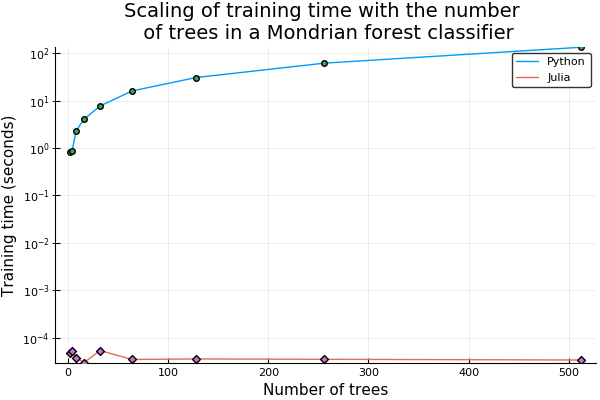

In [14]:
d=5
X, Y, x, y = FakedataClassif(1000,d,100);
Y = Y.+1;
y = y.+1;

time = []
acc = []
trees = []
for j in collect(1:9)
    push!(trees,2^j)
    MF = Mondrian_Forest_Classifier(2^j)
    tic()
    train!(MF,X,Y,1e9)
    t = toq()
    println(t)
    push!(time,t)
    @time pred=predict!(MF, x);
    push!(acc,correctrate(y,convert(Array{Int,1},pred)))
    println(MF.n_trees)
end

println(time)
println(acc)

using CSV
times_py = convert(Array{Float64,1},CSV.read("comparisons/times_py")[2])
pyplot()

plot(trees,times_py,label="Python", yscale=:log10)
plot!(trees,time,label="Julia", yscale=:log10)
scatter!(trees,times_py,label="")
scatter!(trees,time,label="",markershape=:auto)
title!("Scaling of training time with the number \n of trees in a Mondrian forest classifier")
xlabel!("Number of trees")
ylabel!("Training time (seconds)")